# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ELE-492
# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$HW-3
## 1. Honor code
I pledge that I have not received or given any aid in this homework. All the work
presented below is my own work.<br>
Name & surname:Furkan ÇÖZELİ<br>
Number:21427837

## 2- Write a Python code that generates images as shown below. Image size can be 200x200.

### Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Code that generates images

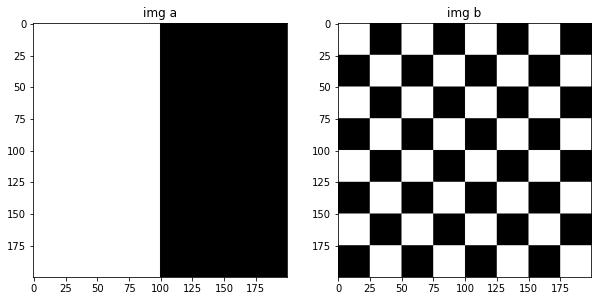

In [2]:
imgA = np.zeros((200,200), np.uint8)
imgA[:,0:100] = 255
imgB = np.zeros((200,200), np.uint8)
i=j=0
while i < 8:
    while j < 8:
        if (i % 2) == 0 and (j % 2) == 0 or (i % 2) == 1 and (j % 2) == 1:
            imgB[i*25:i*25+25,j*25:j*25+25] = 255
        j += 1
    j = 0
    i += 1

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(imgA,cmap='gray')
plt.title("img a")

fig.add_subplot(rows, columns, 2)
plt.imshow(imgB,cmap='gray')
plt.title("img b")

plt.show()

Creating img a is simple. The left half will be white and the right half will be black. Creating img b is more difficult than creating img a. If we think of each square in img b as a coordinate, we express the white squares with either only odd numbers or even numbers. We express the black squares with an odd and an even number. I wrote the algorithm of the code to create img b using this situation.

## 3- Show the histogram of the two images.

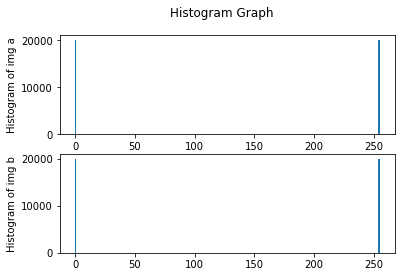

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax0, ax1 = axes.flatten()
fig.suptitle('Histogram Graph')

ax0.hist(imgA.ravel(),256,[0,255])
ax1.hist(imgB.ravel(),256,[0,255])
ax0.set(ylabel="Histogram of img a")
ax1.set(ylabel="Histogram of img b")

plt.show()

The 2 images are different to each other but have the same histogram.

## 4- Use a Gaussian smoothing filter and filter these two images in the spatial domain.

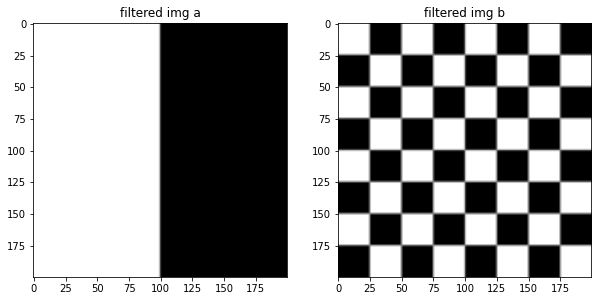

In [4]:
copyImgA = imgA
copyImgB = imgB

kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])/16

filteredImgA = cv2.filter2D(copyImgA, -1, kernel)
filteredImgB = cv2.filter2D(copyImgB, -1, kernel)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(filteredImgA,cmap='gray')
plt.title("filtered img a")

fig.add_subplot(rows, columns, 2)
plt.imshow(filteredImgB,cmap='gray')
plt.title("filtered img b")

plt.show()

There is function for Gaussian smoothing in Opencv library. But I chose to write the kernel myself instead. I wrote the kernel in 3x3 size. Images blurred a little.

## 5- Show the histograms of the resulting smoothed images.

There are pixels with [  0  64 191 255] values in the filtered img a.
There are pixels with [  0  64  96 159 191 255] values in the filtered img b.


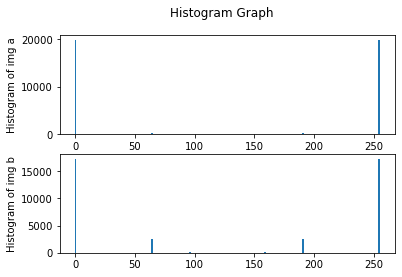

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax0, ax1 = axes.flatten()
fig.suptitle('Histogram Graph')

ax0.hist(filteredImgA.ravel(),256,[0,255])
ax1.hist(filteredImgB.ravel(),256,[0,255])
ax0.set(ylabel="Histogram of img a")
ax1.set(ylabel="Histogram of img b")

print("There are pixels with {} values in the filtered img a.".format(np.unique(filteredImgA)))
print("There are pixels with {} values in the filtered img b.".format(np.unique(filteredImgB)))

plt.show()

After the Gaussian smoothing process, pixels with values of 64 and 191 for the image a were formed. For image b, pixels with values of 64, 96, 159 and 191 were created. img a has only the edge. img b has both an edge and a corner. Due to this situation, pixels with 96 and 159 values were formed in image b. And in addition to these, since the image b has more edges, there are more pixels with 64 and 191 values.

### Repeat 4 and 5 for kernel size 5x5.

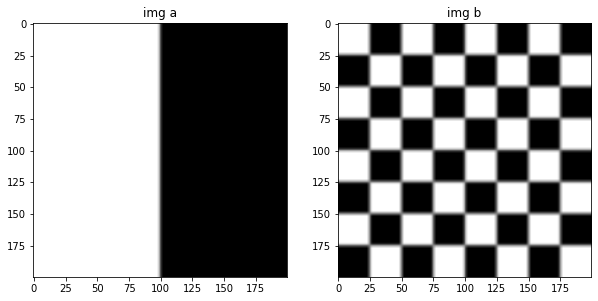

In [6]:
copyImgA2 = imgA
copyImgB2 = imgB

kernel2 = np.array([[1, 2, 3, 2, 1],
                    [2, 4, 6, 4, 2],
                    [3, 6, 9, 6, 3],
                    [2, 4, 6, 4, 2],
                    [1, 2, 3, 2, 1]])/81

filteredImgA2 = cv2.filter2D(copyImgA2, -1, kernel2)
filteredImgB2 = cv2.filter2D(copyImgB2, -1, kernel2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(filteredImgA2,cmap='gray')
plt.title("img a")

fig.add_subplot(rows, columns, 2)
plt.imshow(filteredImgB2,cmap='gray')
plt.title("img b")

plt.show()

Here, we see what happens when the kernel size is 5x5. More blurred images appear. The larger the kernel size, the larger the area around the edge or corner is affected.

There are pixels with [  0  28  85 170 227 255] values in the filtered img a.
There are pixels with [  0  28  50  85  94 113 142 161 170 205 227 255] values in the filtered img b.


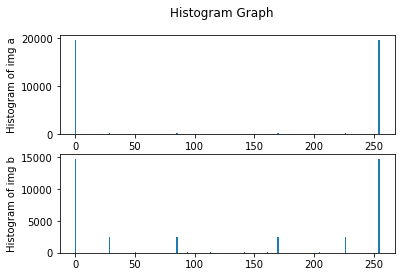

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax0, ax1 = axes.flatten()
fig.suptitle('Histogram Graph')

ax0.hist(filteredImgA2.ravel(),256,[0,255])
ax1.hist(filteredImgB2.ravel(),256,[0,255])
ax0.set(ylabel="Histogram of img a")
ax1.set(ylabel="Histogram of img b")

print("There are pixels with {} values in the filtered img a.".format(np.unique(filteredImgA2)))
print("There are pixels with {} values in the filtered img b.".format(np.unique(filteredImgB2)))

plt.show()

## 6- Take the DFT and show the frequency content in both images. 

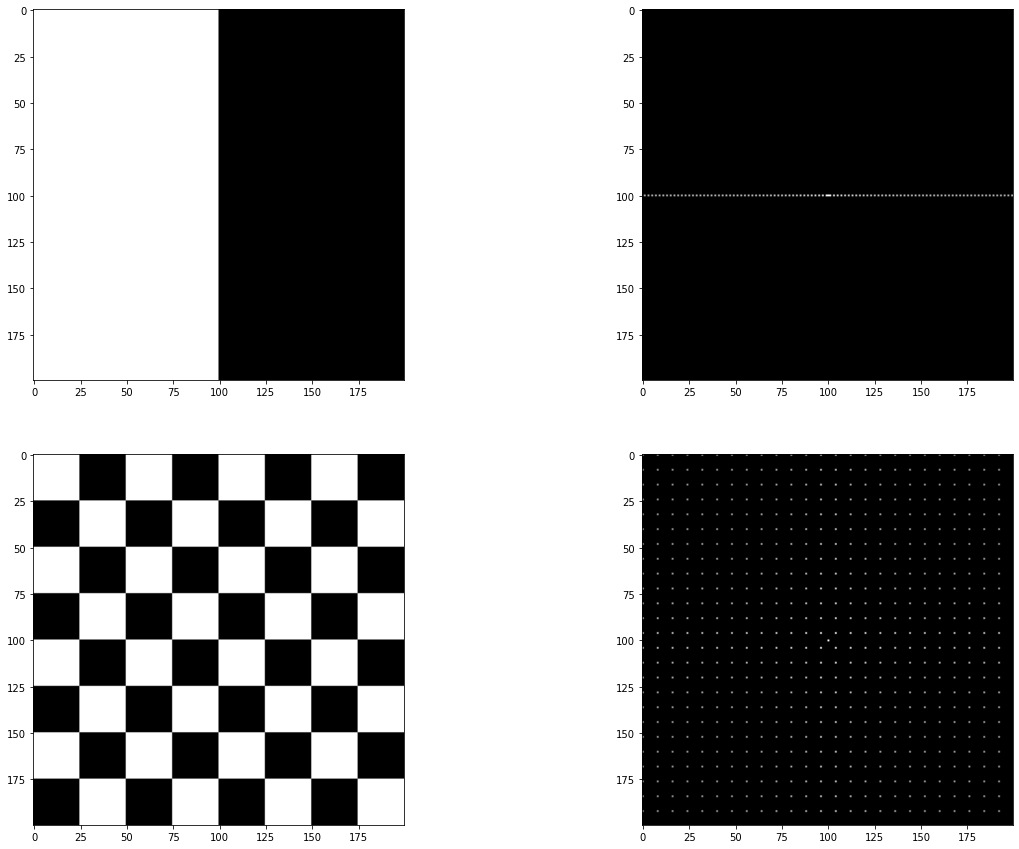

In [8]:
f1 = np.fft.fft2(imgA)
f2 = np.fft.fft2(imgB)

fshift1 = np.fft.fftshift(f1)
fshift2 = np.fft.fftshift(f2)

magnitude_spectrum1 = 20*np.log(np.abs(fshift1) + 1)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2) + 1)

fig = plt.figure(figsize=(20, 15))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(imgA,cmap='gray')

fig.add_subplot(rows, columns, 2)
plt.imshow(magnitude_spectrum1,cmap='gray')

fig.add_subplot(rows, columns, 3)
plt.imshow(imgB,cmap='gray')

fig.add_subplot(rows, columns, 4)
plt.imshow(magnitude_spectrum2,cmap='gray')

plt.show()

In img a, the points are horizontal because the high frequency is in the horizontal direction. In img b, the points are everywhere because the high frequency is in all directions. But since the image has an order, the dots are also in order.

## 7- Use an ideal lowpass filter to filter these images and show your results. Comment on the effects of the parameters. (Work this question out in the frequency domain)

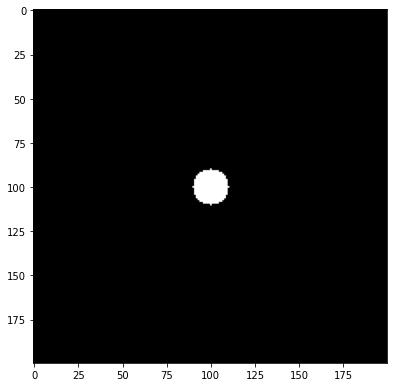

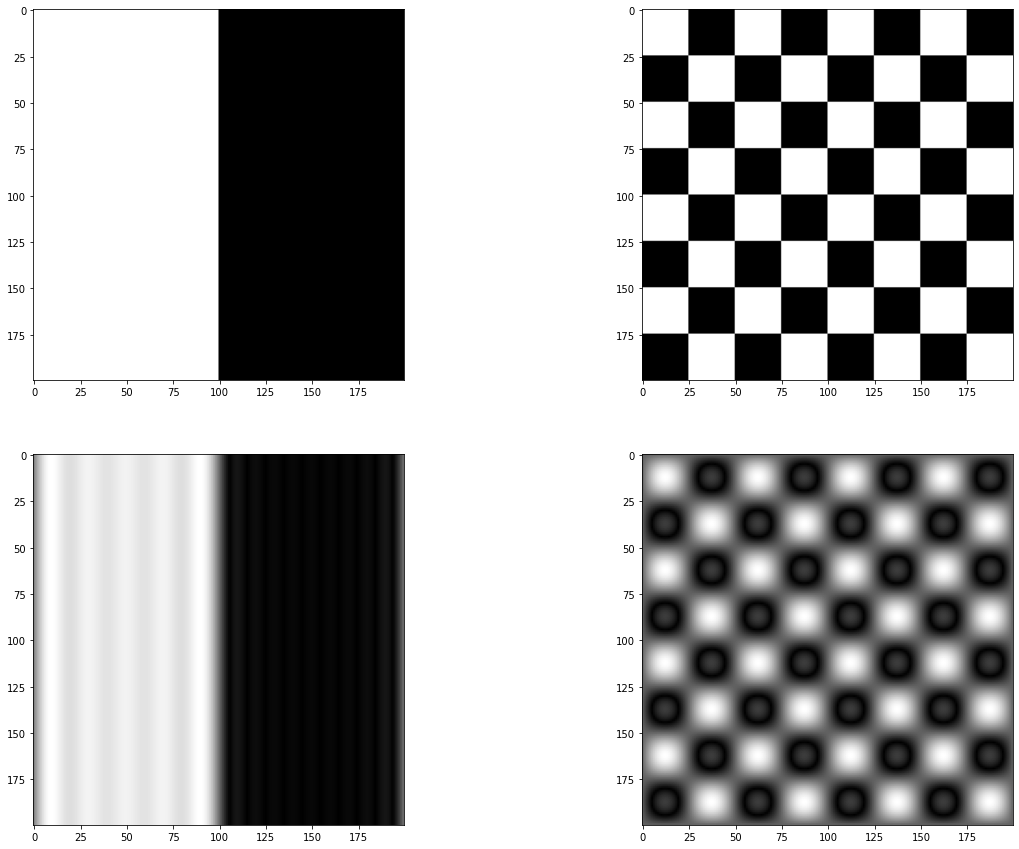

In [9]:
f_imgA = np.float32(imgA)
f_imgB = np.float32(imgB)

dft1 = cv2.dft(f_imgA, flags = cv2.DFT_COMPLEX_OUTPUT)
dft2 = cv2.dft(f_imgB, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift1 = np.fft.fftshift(dft1)
dft_shift2 = np.fft.fftshift(dft2)

mask = np.zeros((200, 200, 2), np.uint8)
mask2 = np.zeros((200, 200), np.uint8)
mask2 = cv2.circle(mask2,(100, 100), 10, (1), -1)
mask[:,:,0] = mask2
mask[:,:,1] = mask2

fshift1 = dft_shift1*mask
fshift2 = dft_shift2*mask

f_ishift1 = np.fft.ifftshift(fshift1)
f_ishift2 = np.fft.ifftshift(fshift2)

img_back = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
img_back = cv2.idft(f_ishift2)
img_back2 = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

fig = plt.figure(figsize=(10, 6.5))
rows = 1
columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(mask2, cmap='gray')

#plt.savefig('mask R50.png')

fig2 = plt.figure(figsize=(20, 15))

rows = 2
columns = 2

fig2.add_subplot(rows, columns, 1)
plt.imshow(imgA, cmap='gray')

fig2.add_subplot(rows, columns, 2)
plt.imshow(imgB, cmap='gray')

fig2.add_subplot(rows, columns, 3)
plt.imshow(img_back1, cmap='gray')

fig2.add_subplot(rows, columns, 4)
plt.imshow(img_back2, cmap='gray')

#plt.savefig('result R50.png')

plt.show()

I set the radius of the ideal lowpass filter to be 10. As seen in the images above, quite blurry images occurred. The larger the radius, the less this blurring. The reason for this blurring is that the images consist of the sum of some frequencies in the frequency domain. When we apply a filter, some frequencies are lost. The places in the image corresponding to these lost frequencies are changed. Below are the applications for radius 50 and 100. When the 50-radius mask is applied, the loss is less, resulting in an image closer to the original image. When the 100 radius mask is applied, there is no loss in the frequency domain created for the img a. The resulting image is the same as the original image.

<b>For radius 50

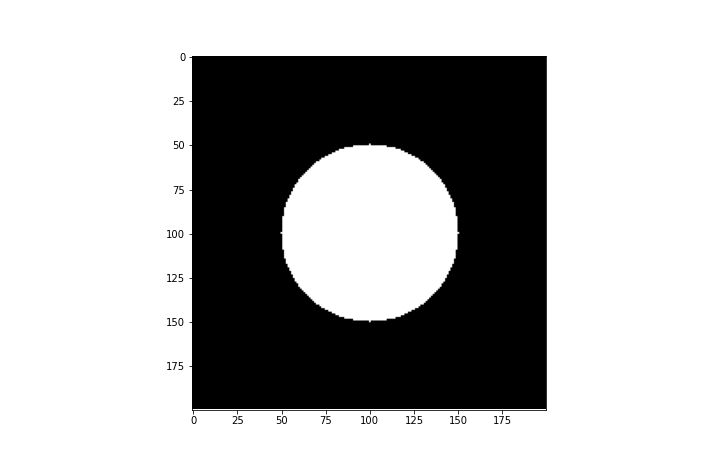

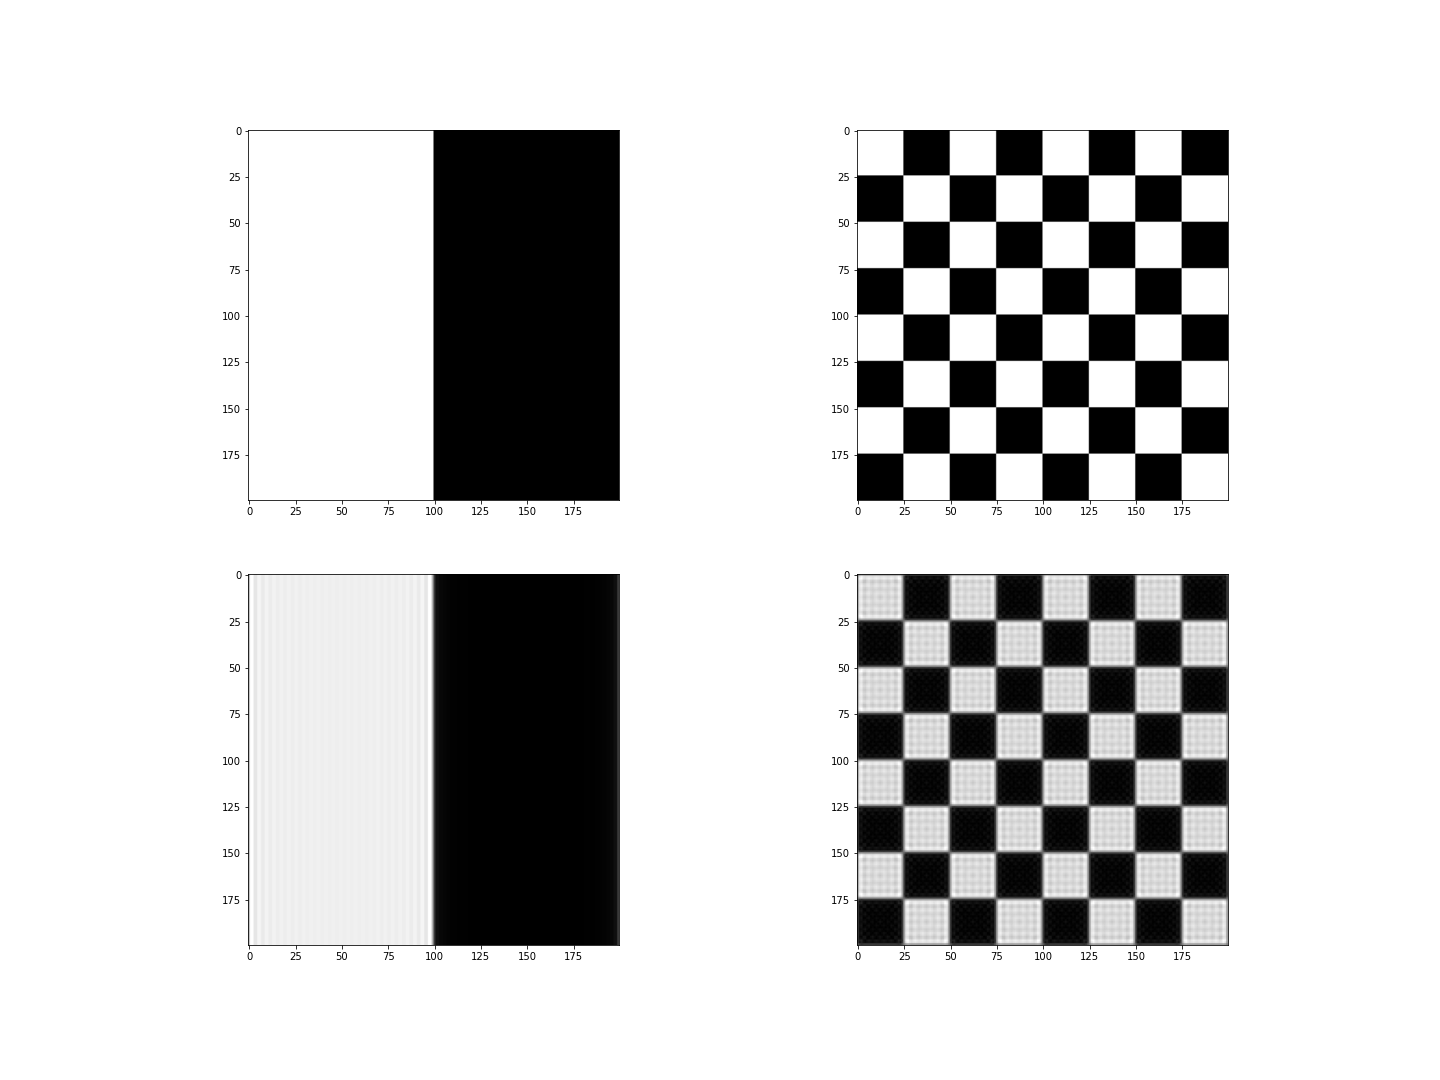

<b>For radius 100

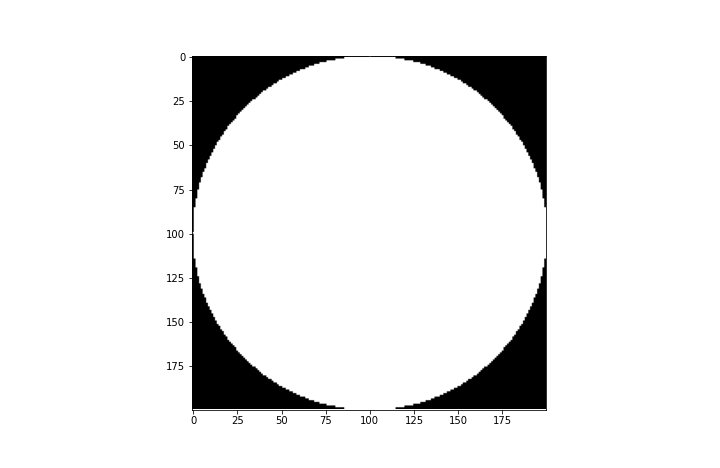

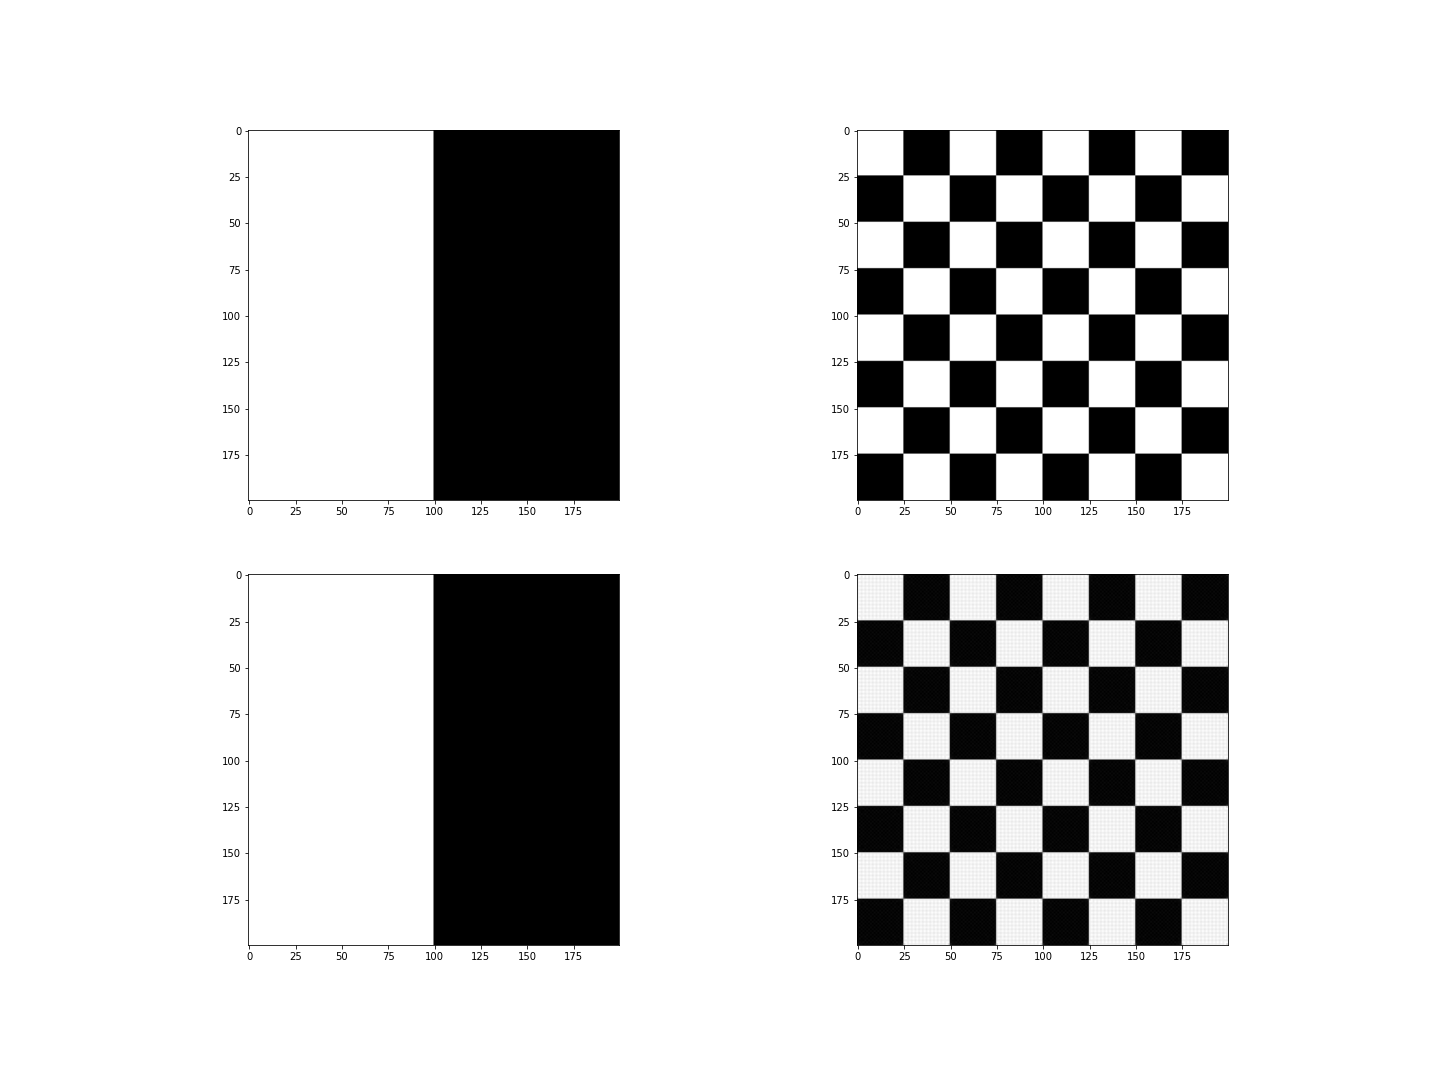